# Changing chirp from from above at 0.3 gain

In [28]:
import jpype

jpype.startJVM(jpype.getDefaultJVMPath())

In [12]:
import os
import imageio
ims = [im for im in os.listdir() if im.endswith('.png')]
ims.sort(key = lambda f: f.split('T')[1])
imageio.mimsave('results.gif', [imageio.imread(im) for im in ims], fps=10)

<AxesSubplot:xlabel='variable'>

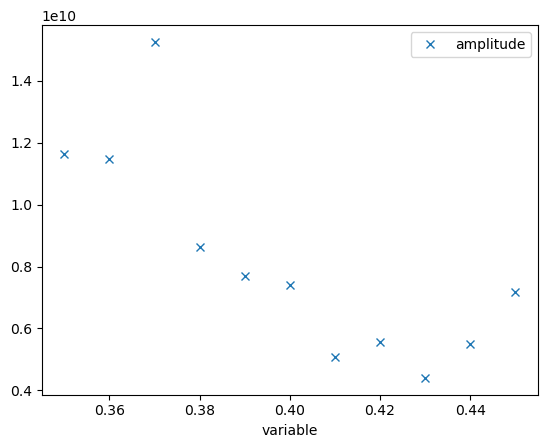

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sigtools
files = [f for f in os.listdir()]

initial = pd.read_pickle('initial.pkl')
qmeter = pd.read_csv([f for f in files if f.startswith('qmeter') and f.endswith('.csv')][0]).drop_duplicates()[1:]

scope0 = []
scope0_files = [f for f in files if f.startswith('scope_0') and f.endswith('.pkl')]
scope0_files.sort(key = lambda f: f.split('T')[1])
for file in scope0_files[1:]:
    scope0.append(pd.read_pickle(file))

scope1 = []
scope1_files = [f for f in files if f.startswith('scope_1') and f.endswith('.pkl')]
scope1_files.sort(key = lambda f: f.split('T')[1])
for file in scope1_files[1:]:
    scope1.append(pd.read_pickle(file))
qmeter.plot(x='variable', y='amplitude', style='x')

[80 83 86]
chirp from 0.3 to 0.35 	freq from 0.0012 to 0.0013
[81 84 86 89]
chirp from 0.3 to 0.36 	freq from 0.0013 to 0.0014
[81 84 86 88 91]
chirp from 0.3 to 0.37 	freq from 0.0013 to 0.0014
[81 84 90 93]
chirp from 0.3 to 0.38 	freq from 0.0013 to 0.0014
[81 92 96]
chirp from 0.3 to 0.39 	freq from 0.0013 to 0.0015
[82 86 88 92 94 98]
chirp from 0.3 to 0.4 	freq from 0.0013 to 0.0015
[ 81  86  91  96 101]
chirp from 0.3 to 0.41 	freq from 0.0013 to 0.0016
[ 82  86  91  93  98 103]
chirp from 0.3 to 0.42 	freq from 0.0013 to 0.0016
[ 82 101 105]
chirp from 0.3 to 0.43 	freq from 0.0013 to 0.0016
[ 82  87  90  95 100 103 108]
chirp from 0.3 to 0.44 	freq from 0.0013 to 0.0017
[ 82  87  90  93  95  97  99 102 105 110]
chirp from 0.3 to 0.45 	freq from 0.0013 to 0.0017


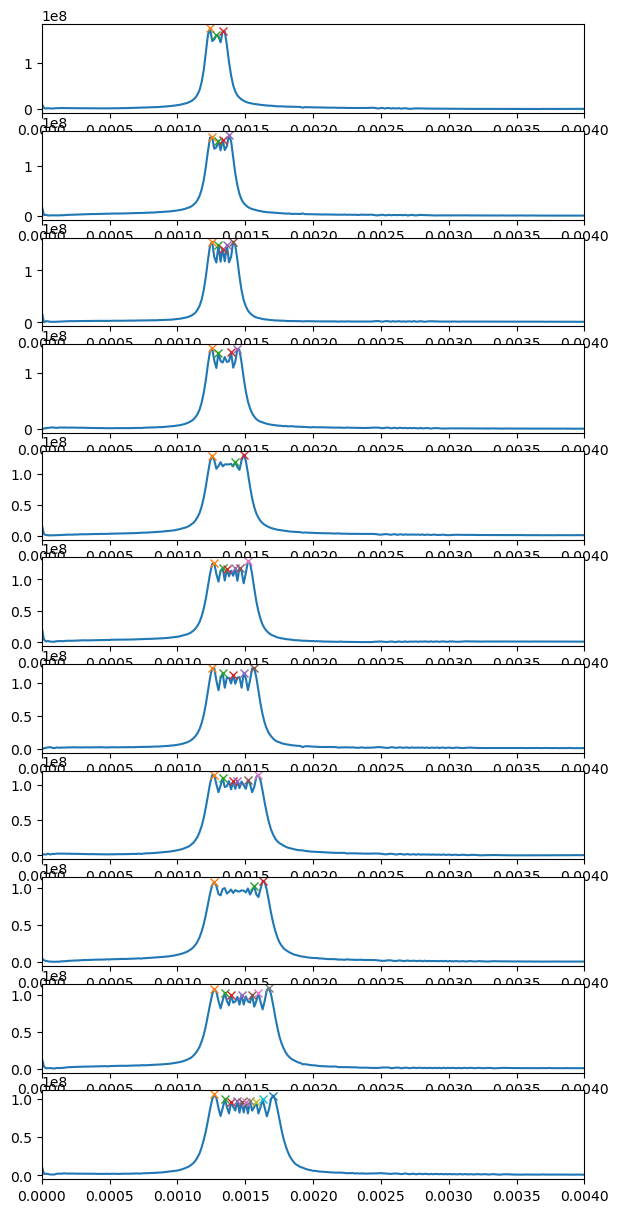

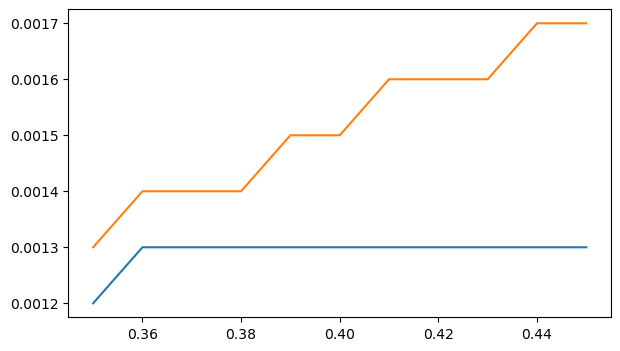

In [182]:
fig, ax = plt.subplots(len(scope0), 1,figsize=(7, 15))
fig1, ax1 = plt.subplots(figsize=(7, 4))
freq_start = []
freq_stop = []
for i, (param, scope) in enumerate(list(zip(initial['param_space'], scope0))):
    data = scope['data']
    limit = (1000, 65500)
    time = data['time'][limit[0]:limit[1]]
    value = data['value'][limit[0]:limit[1]]

    #ax[i].plot(time, value, label='ch1')

    yf = np.fft.rfft(value)
    xf = np.fft.rfftfreq(len(time))
    ax[i].plot(xf, np.abs(yf), label='ch1 fft')
    ax[i].set_xlim(0, 0.004)

    peaks, properties = sigtools.find_peaks(np.abs(yf), prominence = 1e7)
    # plot all of the peaks found
    for peak in peaks:
        ax[i].plot(xf[peak], np.abs(yf[peak]), 'x', label='peaks')

    frequency_range = [round(xf[peak], 4) for peak in peaks]
    frequency_start = frequency_range[0]
    frequency_end = frequency_range[-1]
    freq_start.append(frequency_start)
    freq_stop.append(frequency_end)
    print(peaks)

    print(f"chirp from {initial['qmeter_settings']['chirp_h_start'][1]} to {round(param, 2)} \tfreq from {frequency_start} to {frequency_end}")
ax1.plot(initial['param_space'], freq_start)
ax1.plot(initial['param_space'], freq_stop)
    

# Changing chirp interval